In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score

## Reading the data

In [80]:
original_df=pd.read_csv('train.csv')

In [81]:
# original_df is the original dataframe

In [82]:
print('Shape:',original_df.shape)

Shape: (204277, 18)


In [83]:
original_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,DRIRC89L0T,18,137576,209136,846,26,2,10.47,60,0.81,High School,Self-employed,Single,Yes,No,Business,No,0
1,TS0FIUNHNU,47,57194,5970,748,30,2,19.72,36,0.73,High School,Unemployed,Divorced,No,Yes,Education,No,0
2,I0YR284A1V,26,84328,95065,453,7,2,24.25,12,0.45,Master's,Self-employed,Married,No,No,Other,Yes,0
3,WB1T7NQV8A,53,49795,229582,533,107,3,14.44,60,0.17,Bachelor's,Self-employed,Single,Yes,No,Auto,Yes,1
4,J6GU9M4G1Z,49,115450,22072,840,0,4,24.48,12,0.11,Bachelor's,Part-time,Single,No,Yes,Education,Yes,0


## Different Types of Columns

In [84]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204277 entries, 0 to 204276
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          204277 non-null  object 
 1   Age             204277 non-null  int64  
 2   Income          204277 non-null  int64  
 3   LoanAmount      204277 non-null  int64  
 4   CreditScore     204277 non-null  int64  
 5   MonthsEmployed  204277 non-null  int64  
 6   NumCreditLines  204277 non-null  int64  
 7   InterestRate    204277 non-null  float64
 8   LoanTerm        204277 non-null  int64  
 9   DTIRatio        204277 non-null  float64
 10  Education       204277 non-null  object 
 11  EmploymentType  204277 non-null  object 
 12  MaritalStatus   204277 non-null  object 
 13  HasMortgage     204277 non-null  object 
 14  HasDependents   204277 non-null  object 
 15  LoanPurpose     204277 non-null  object 
 16  HasCoSigner     204277 non-null  object 
 17  Default   

## Checking for null values

In [85]:
original_df.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [86]:
# No null values at all. Great.

## Are there any duplicated values

In [87]:
original_df.duplicated().sum()

0

In [88]:
# No duplicate values at all. Great.

## Univariate Analysis

### First let us analyze the numerical columns

In [89]:
original_df.select_dtypes(include=[float, int]).corr()['Default']

Age              -0.167484
Income           -0.100515
LoanAmount        0.085519
CreditScore      -0.034128
MonthsEmployed   -0.095429
NumCreditLines    0.028565
InterestRate      0.129885
LoanTerm          0.000815
DTIRatio          0.018595
Default           1.000000
Name: Default, dtype: float64

In [90]:
# You can see here that 'Age' and 'Income' and 'Months Employed' have stronger inverse correlation with defaulting and 'LoanAmount' and 'InterestRate' have stronger direct correlation with defaulting 

In [91]:
defaulters=original_df[original_df['Default']==1]

In [92]:
print('Number of defaulters:',defaulters.shape[0])

Number of defaulters: 23753


In [93]:
non_defaulters=original_df[original_df['Default']==0]

In [94]:
print('Number of non defaulters:',non_defaulters.shape[0])

Number of non defaulters: 180524


In [95]:
percentage_of_defaulters=(defaulters.shape[0]/original_df.shape[0]) * 100

In [96]:
print('Percentage of Defaulters:',percentage_of_defaulters)

Percentage of Defaulters: 11.62783867004117


## Numerical Columns

### Age

<Axes: ylabel='Age'>

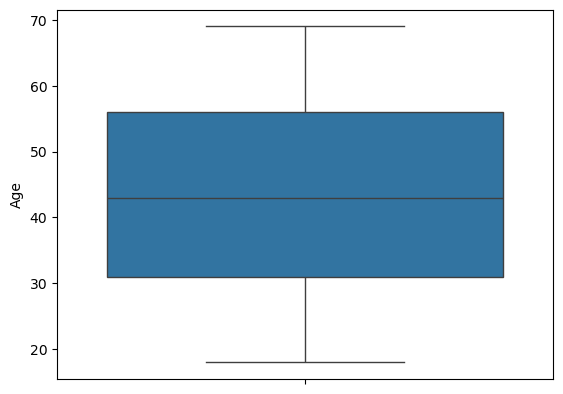

In [97]:
sns.boxplot(original_df['Age'])

In [98]:
# No outliers at all in the Age column. Great for us

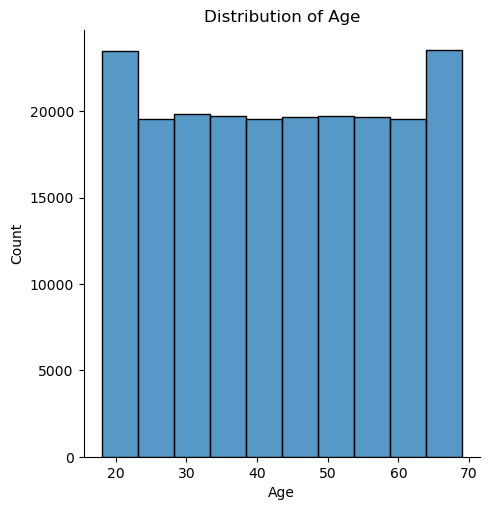

In [99]:
sns.displot(original_df['Age'],bins=10)
plt.title('Distribution of Age')
plt.show()

In [100]:
print('Min Age:',original_df['Age'].min(),' and Max Age:',original_df['Age'].max())

Min Age: 18  and Max Age: 69


In [101]:
# You can kind of see an almost uniform distribution of Age

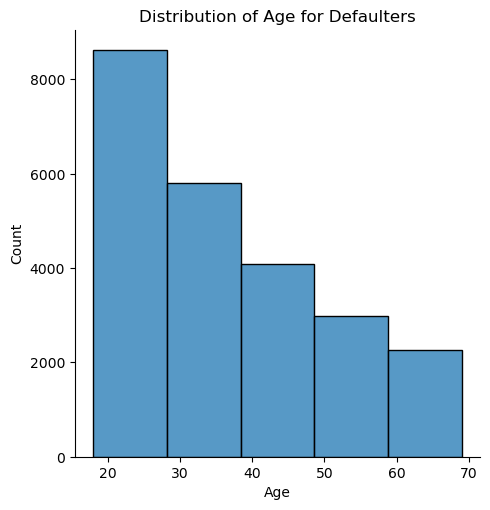

In [102]:
sns.displot(defaulters['Age'],bins=5)
plt.title('Distribution of Age for Defaulters')
plt.show()

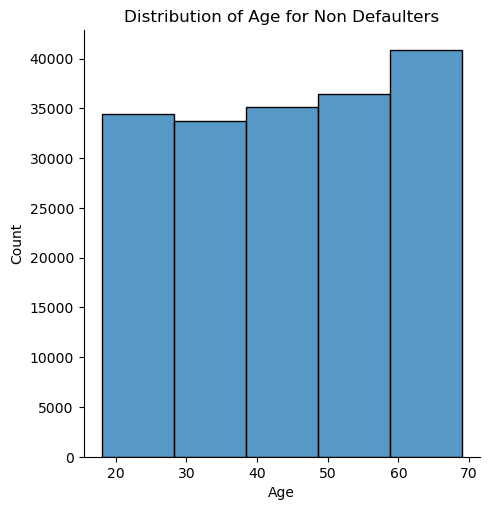

In [103]:
sns.displot(non_defaulters['Age'],bins=5)
plt.title('Distribution of Age for Non Defaulters')
plt.show()

In [104]:
# You can clearly see that younger people have contributed more to loan defaults than older people

### Income

<Axes: ylabel='Income'>

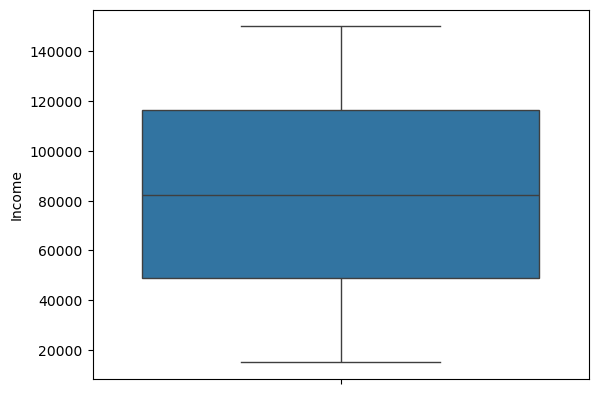

In [105]:
sns.boxplot(original_df['Income'])

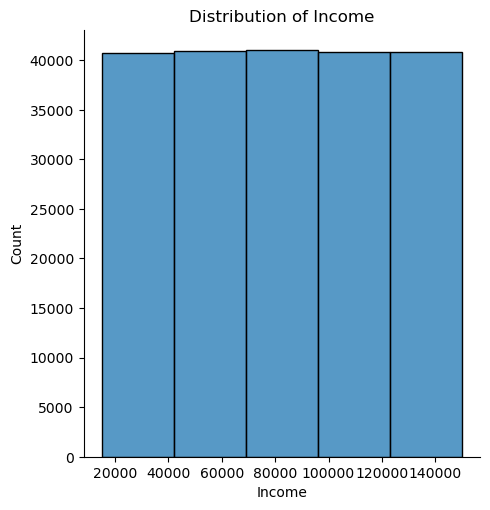

In [106]:
sns.displot(original_df['Income'],bins=5)
plt.title('Distribution of Income')
plt.show()

In [107]:
# You can see that there is no outliers in income as well. Great. The distribution is again pretty uniform

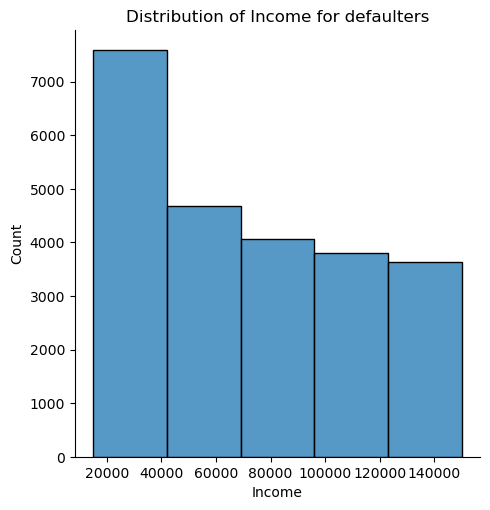

In [108]:
sns.displot(defaulters['Income'],bins=5)
plt.title('Distribution of Income for defaulters')
plt.show()

In [109]:
# you can see here that lesser income people have contributed more to defaults

### Loan Amount

<Axes: ylabel='LoanAmount'>

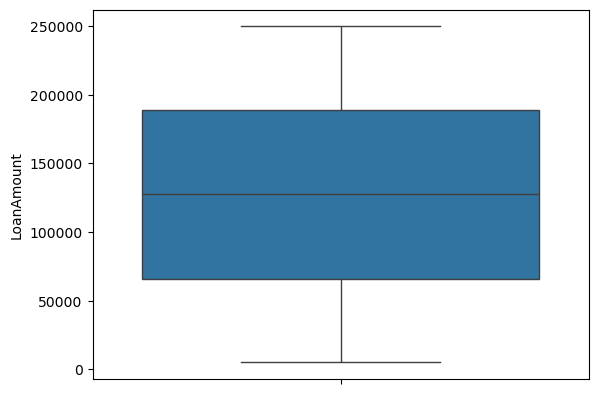

In [110]:
sns.boxplot(original_df['LoanAmount'])

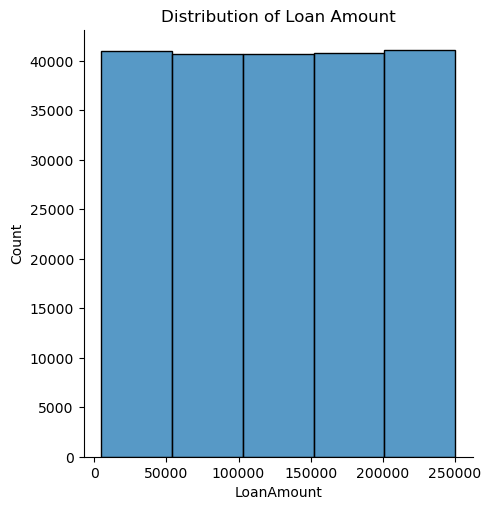

In [111]:
sns.displot(original_df['LoanAmount'],bins=5)
plt.title('Distribution of Loan Amount')
plt.show()

In [112]:
# You can see that there is no outliers in loan amount as well. Great. The distribution is again pretty uniform

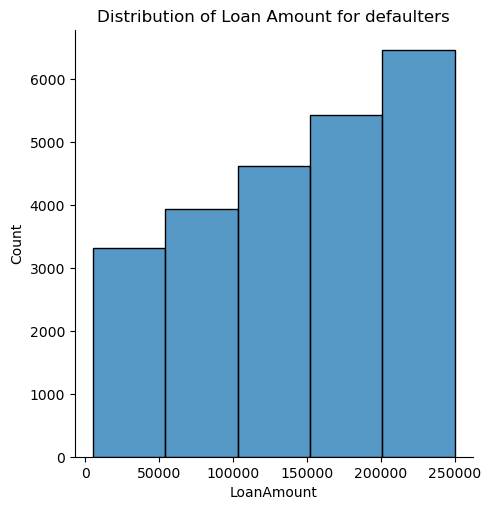

In [113]:
sns.displot(defaulters['LoanAmount'],bins=5)
plt.title('Distribution of Loan Amount for defaulters')
plt.show()

In [114]:
# you can see that people with higher loan amounts have defaulted more

### Credit Score

<Axes: ylabel='CreditScore'>

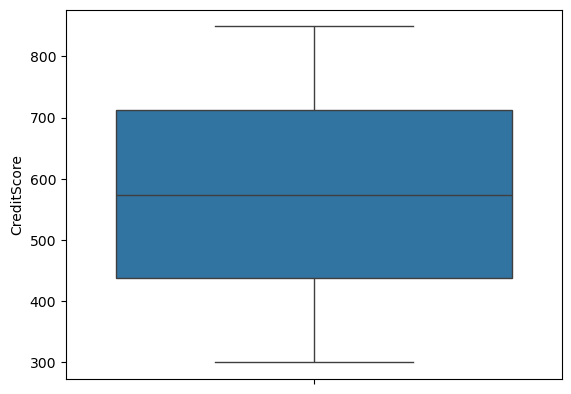

In [115]:
sns.boxplot(original_df['CreditScore'])

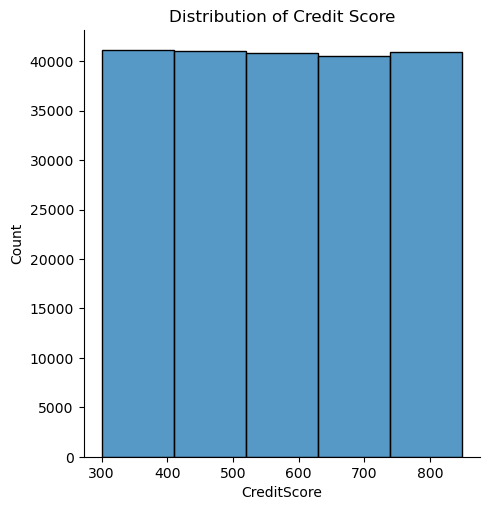

In [116]:
sns.displot(original_df['CreditScore'],bins=5)
plt.title('Distribution of Credit Score')
plt.show()

In [117]:
# You can see that there is no outliers in credit score as well. Great. The distribution is again pretty uniform

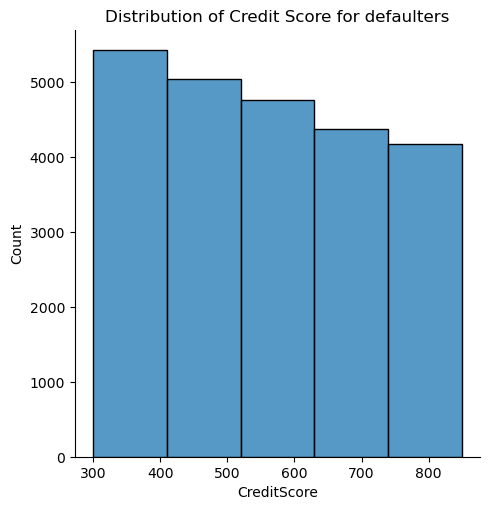

In [118]:
sns.displot(defaulters['CreditScore'],bins=5)
plt.title('Distribution of Credit Score for defaulters')
plt.show()

In [119]:
# You can see people with lower credit score have defaulted more

### Months Employed

<Axes: ylabel='MonthsEmployed'>

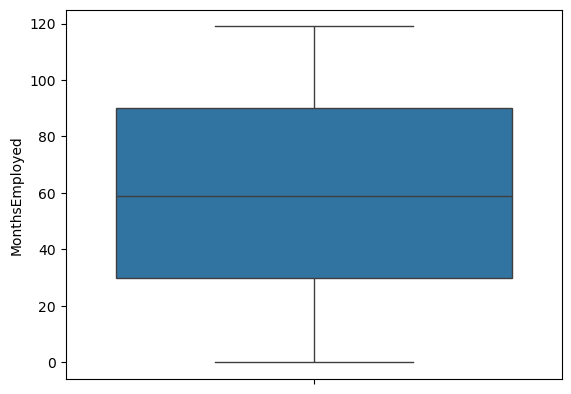

In [120]:
sns.boxplot(original_df['MonthsEmployed'])

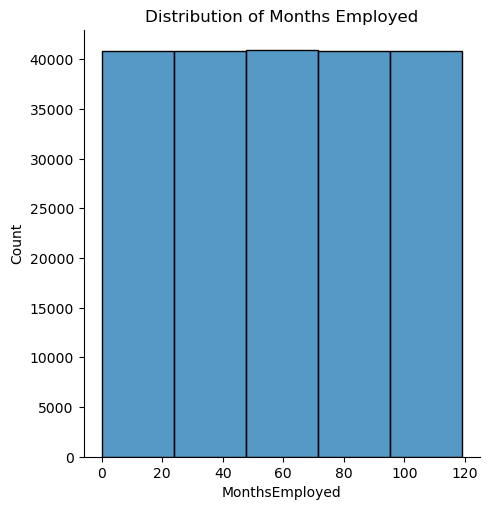

In [121]:
sns.displot(original_df['MonthsEmployed'],bins=5)
plt.title('Distribution of Months Employed')
plt.show()

In [122]:
# You can see that there is no outliers in months employed score as well. Great. The distribution is again pretty uniform

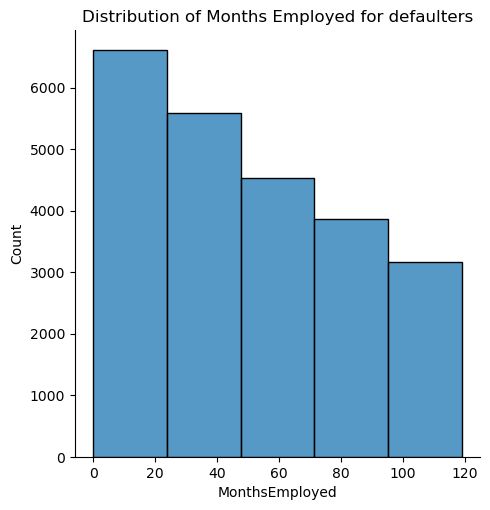

In [123]:
sns.displot(defaulters['MonthsEmployed'],bins=5)
plt.title('Distribution of Months Employed for defaulters')
plt.show()

In [124]:
# People who have been employed for lesser months in total have contributed more to defaulting

### Number of credit lines

In [125]:
# The "number of credit lines" typically refers to the total number of credit accounts a person has on their credit report. These credit lines include all accounts that provide a form of credit, such as: credit card, loans and mortgages

<Axes: ylabel='NumCreditLines'>

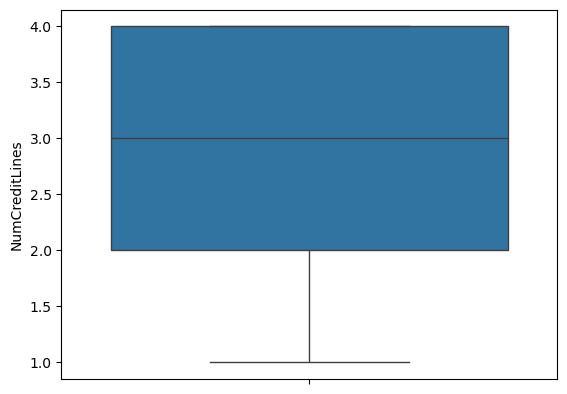

In [126]:
sns.boxplot(original_df['NumCreditLines'])

In [127]:
print(original_df['NumCreditLines'].quantile(0.75))

4.0


NumCreditLines
2    51244
3    51154
4    51096
1    50783
Name: count, dtype: int64


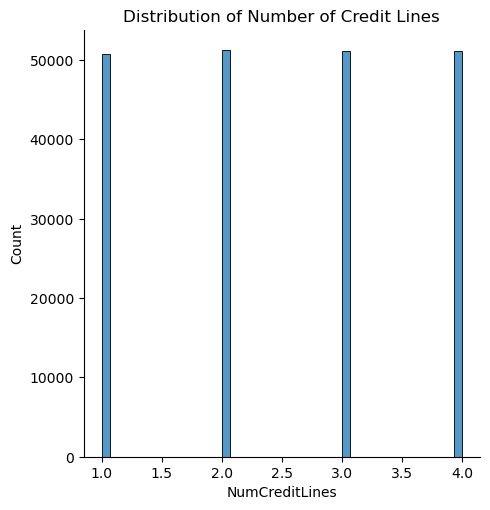

In [128]:
print(original_df['NumCreditLines'].value_counts())
sns.displot(original_df['NumCreditLines'])
plt.title('Distribution of Number of Credit Lines')
plt.show()

In [129]:
# No outliers here too and almost equally distributed between 1 to 4

NumCreditLines
4    6623
3    6130
2    5639
1    5361
Name: count, dtype: int64


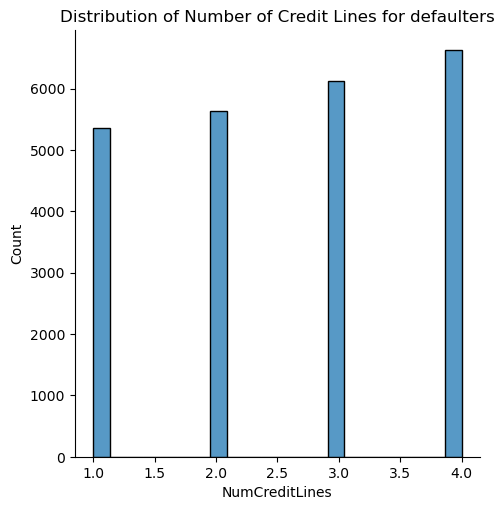

In [130]:
print(defaulters['NumCreditLines'].value_counts())
sns.displot(defaulters['NumCreditLines'])
plt.title('Distribution of Number of Credit Lines for defaulters')
plt.show()

In [131]:
# People with more credit lines have defaulted slightly more than people with lesser number of credit lines

### Interest Rate

<Axes: ylabel='InterestRate'>

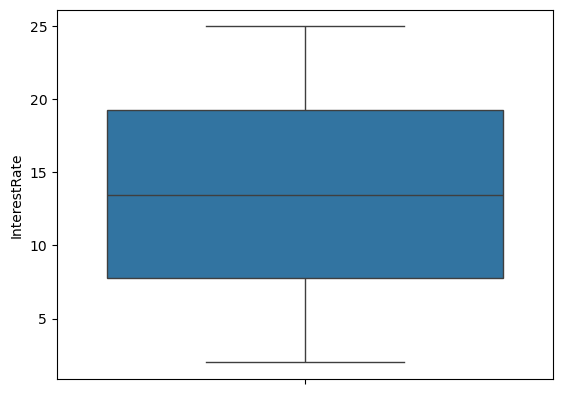

In [132]:
sns.boxplot(original_df['InterestRate'])

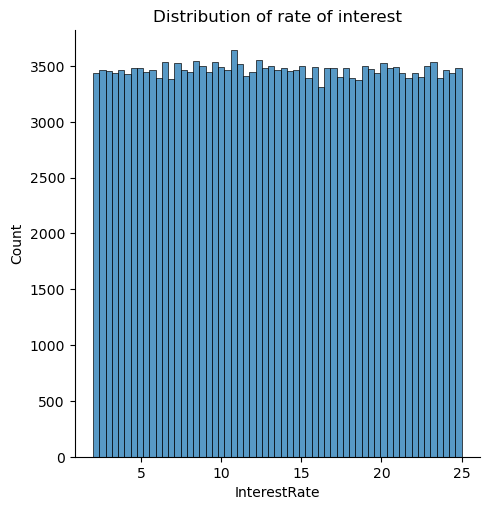

In [133]:
sns.displot(original_df['InterestRate'])
plt.title('Distribution of rate of interest')
plt.show()

In [134]:
# uniformly distributed with no outliers

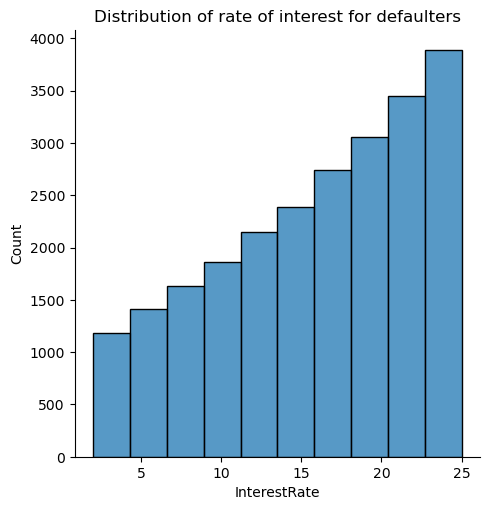

In [135]:
sns.displot(defaulters['InterestRate'],bins=10)
plt.title('Distribution of rate of interest for defaulters')
plt.show()

In [136]:
# you can clearly see an almost perfect linear relationship between defaults and interest rates with higher interest rates leading to more defaulting

### Loan Term

<Axes: ylabel='LoanTerm'>

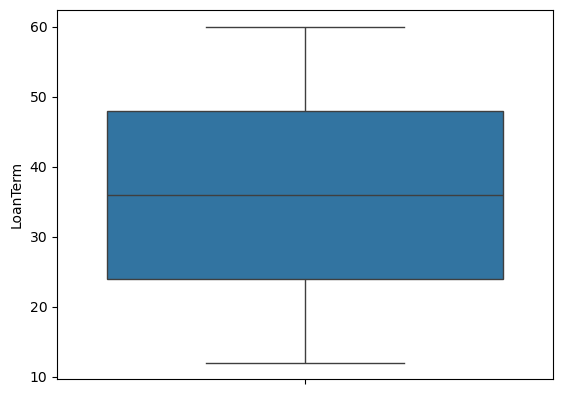

In [137]:
sns.boxplot(original_df['LoanTerm'])

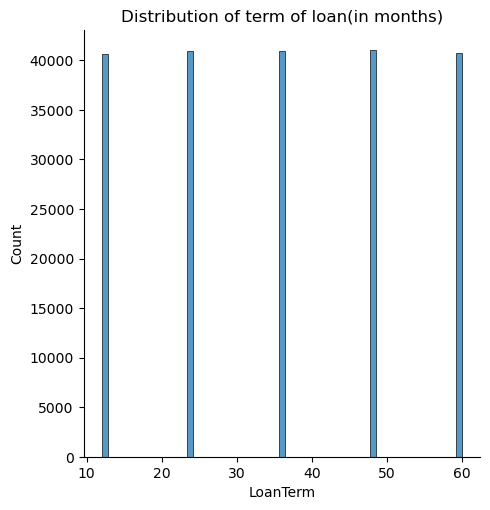

In [138]:
sns.displot(original_df['LoanTerm'])
plt.title('Distribution of term of loan(in months)')
plt.show()

In [139]:
# No outliers , almost uniform distribution

In [140]:
print(defaulters['LoanTerm'].value_counts())

LoanTerm
60    4771
24    4758
36    4754
48    4751
12    4719
Name: count, dtype: int64


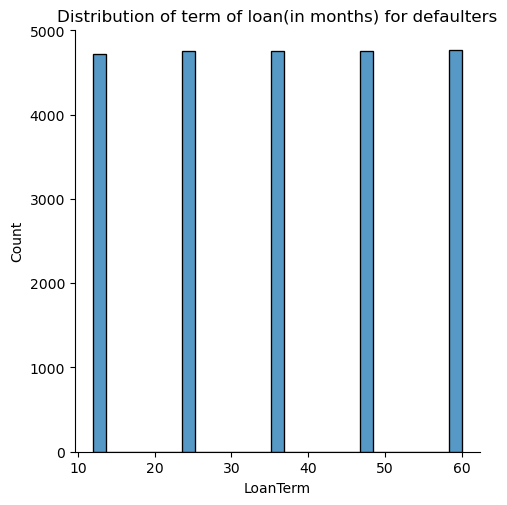

In [141]:
sns.displot(defaulters['LoanTerm'])
plt.title('Distribution of term of loan(in months) for defaulters')
plt.show()

In [142]:
# defaulting and loan period doesn't have strong correlation at all. It seems uniformly distributed

### DTI ratio

<Axes: ylabel='DTIRatio'>

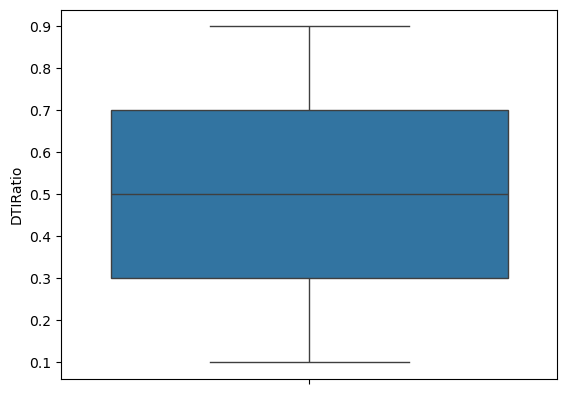

In [143]:
sns.boxplot(original_df['DTIRatio'])

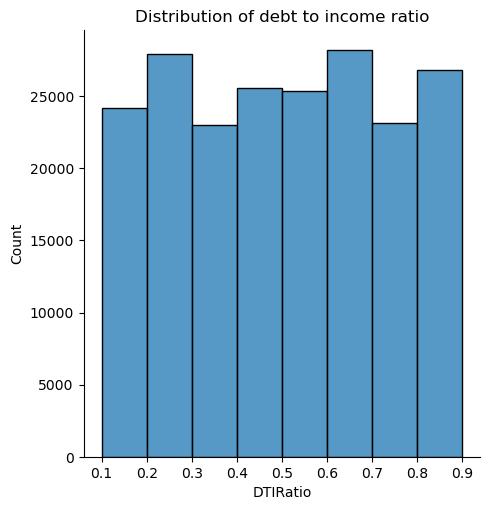

In [144]:
sns.displot(original_df['DTIRatio'],bins=8)
plt.title('Distribution of debt to income ratio')
plt.show()

In [145]:
# No outliers here

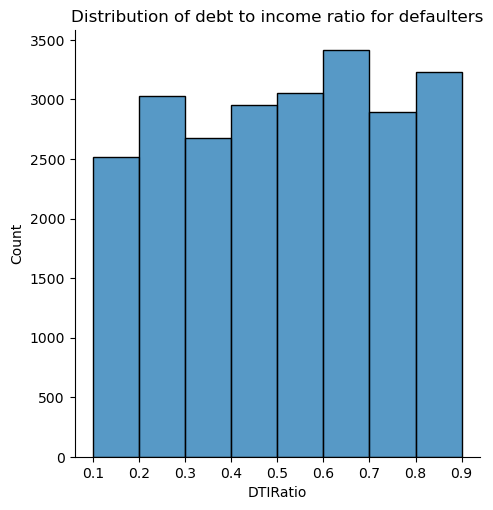

In [146]:
sns.displot(defaulters['DTIRatio'],bins=8)
plt.title('Distribution of debt to income ratio for defaulters')
plt.show()

In [147]:
# Not too strong correlation between dti ratio and defaults

## Categorical Columns

### Education

In [148]:
original_df['Education'].value_counts()

Education
Bachelor's     51483
High School    51046
PhD            50980
Master's       50768
Name: count, dtype: int64

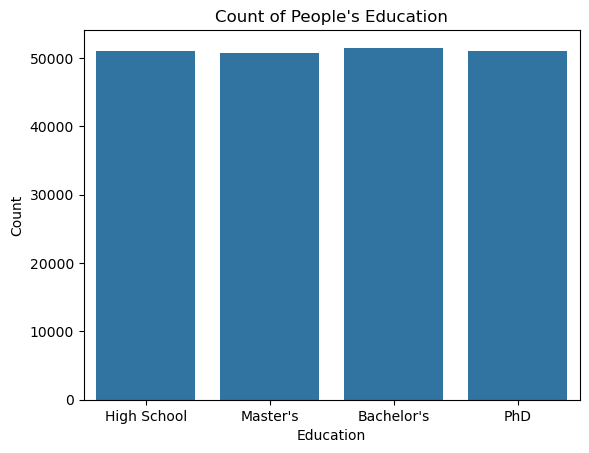

In [149]:
sns.countplot(x='Education', data=original_df)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title("Count of People's Education")
plt.show()

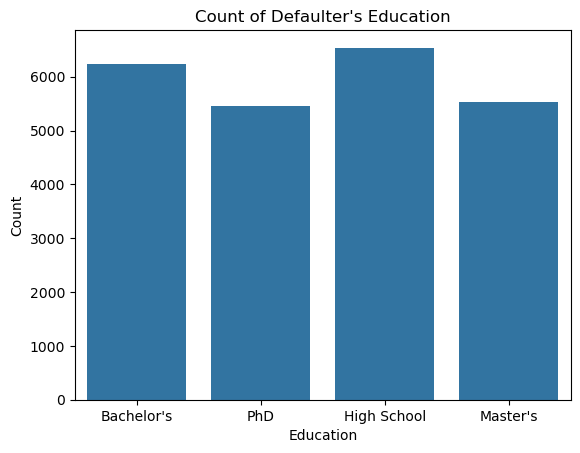

In [150]:
sns.countplot(x='Education', data=defaulters)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title("Count of Defaulter's Education")
plt.show()

In [151]:
defaulters['Education'].value_counts()

Education
High School    6540
Bachelor's     6233
Master's       5531
PhD            5449
Name: count, dtype: int64

In [152]:
# You can see that higher the education, lesser the default
# This column is ordinal, so we have to encode it.
# Define the mapping for ordinal encoding
education_mapping = {
    'High School': 1,
    'Bachelor\'s': 2,
    'Master\'s': 3,
    'PhD': 4
}

# Replace the 'education' column in original_df with the encoded values
original_df['Education'] = original_df['Education'].map(education_mapping)


# Note, the same could be achieved through ordinal encoding as well.

# Define the order of categories for the OrdinalEncoder
# education_order = ['High School', 'Bachelor\'s', 'Master\'s', 'PhD']

# Initialize OrdinalEncoder with the specified order
# ordinal_encoder = OrdinalEncoder(categories=[education_order])
 
# Fit and transform the 'Education' column
# original_df[['Education']] = ordinal_encoder.fit_transform(original_df[['Education']])

# print(original_df)
# this would assign numbers from 0 to 3 instead of 1 to 4 but that isn't an issue.

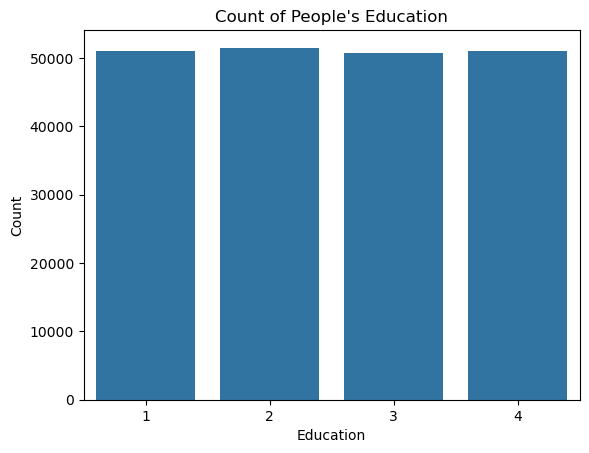

In [153]:
sns.countplot(x='Education', data=original_df)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title("Count of People's Education")
plt.show()

### Employment Type

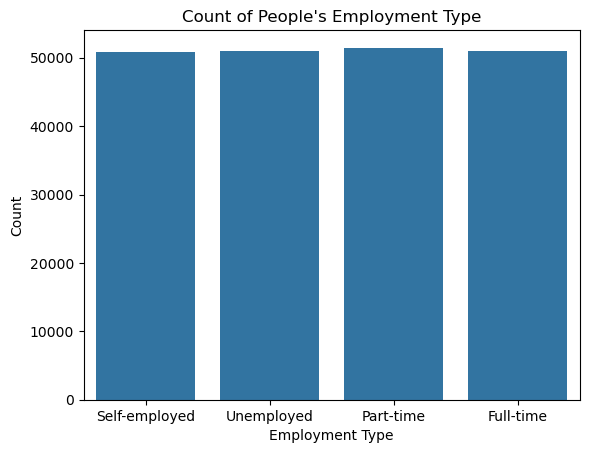

In [154]:
sns.countplot(x='EmploymentType', data=original_df)
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.title("Count of People's Employment Type")
plt.show()

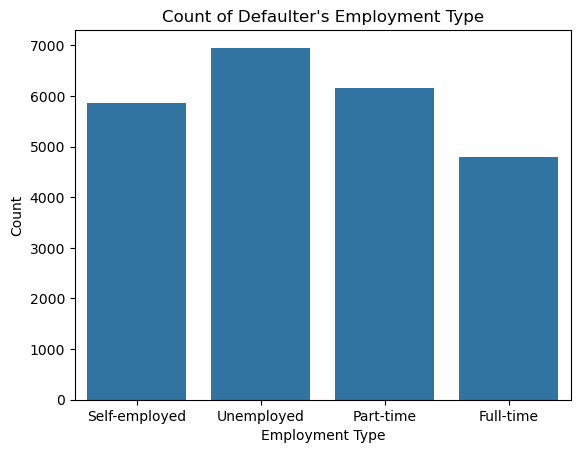

In [155]:
sns.countplot(x='EmploymentType', data=defaulters)
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.title("Count of Defaulter's Employment Type")
plt.show()

In [156]:
# This column is ordinal, so we have to encode it.
# Define the mapping for ordinal encoding
employment_mapping = {
    'Self-employed': 3,
    'Unemployed': 1,
    'Part-time': 2,
    'Full-time': 4
}

# Replace the 'EmploymentType' column in original_df with the encoded values
original_df['EmploymentType'] = original_df['EmploymentType'].map(employment_mapping)

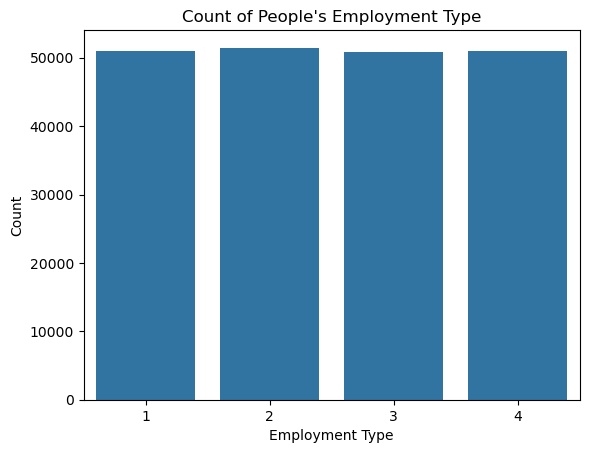

In [157]:
sns.countplot(x='EmploymentType', data=original_df)
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.title("Count of People's Employment Type")
plt.show()

### Marital status

In [158]:
print(original_df['MaritalStatus'].value_counts())

MaritalStatus
Married     68217
Divorced    68137
Single      67923
Name: count, dtype: int64


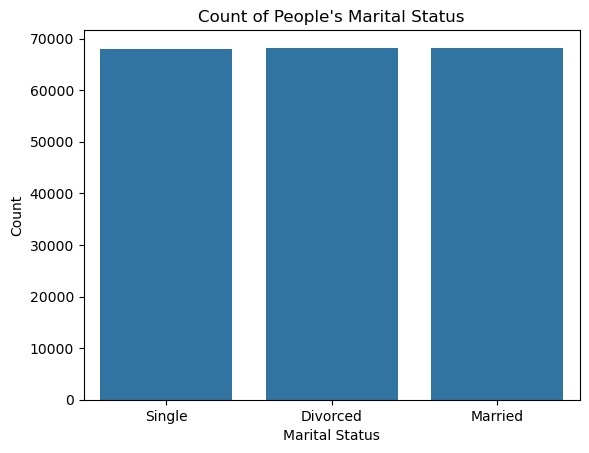

In [159]:
sns.countplot(x='MaritalStatus', data=original_df)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title("Count of People's Marital Status")
plt.show()

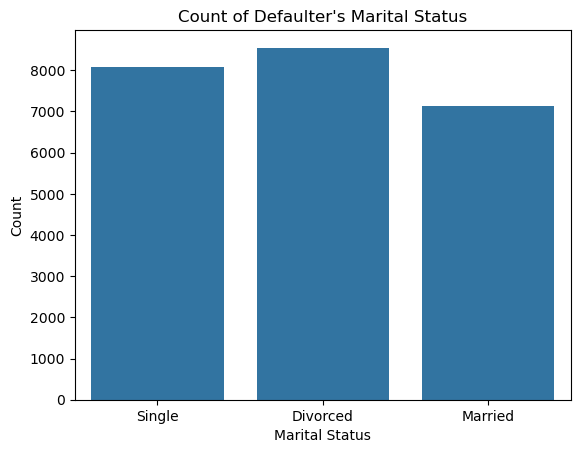

In [160]:
sns.countplot(x='MaritalStatus', data=defaulters)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title("Count of Defaulter's Marital Status")
plt.show()

In [161]:
# This column is ordinal, so we have to encode it.
# Define the mapping for ordinal encoding
marital_status_mapping = {
    'Divorced': 1,
    'Single': 2,
    'Married': 3
}

# Replace the 'MaritalStatus' column in original_df with the encoded values
original_df['MaritalStatus'] = original_df['MaritalStatus'].map(marital_status_mapping)

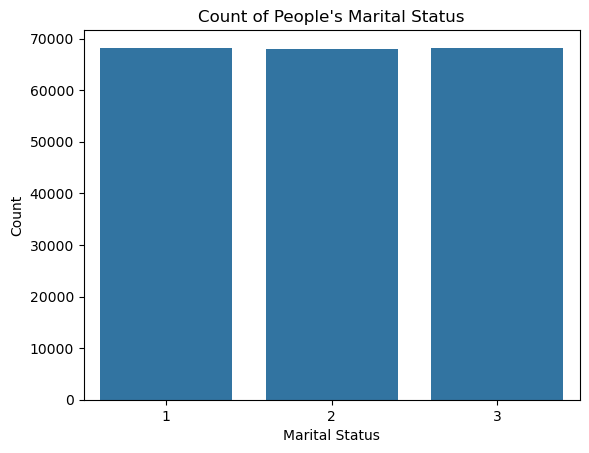

In [162]:
sns.countplot(x='MaritalStatus', data=original_df)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title("Count of People's Marital Status")
plt.show()

### HasMortgage

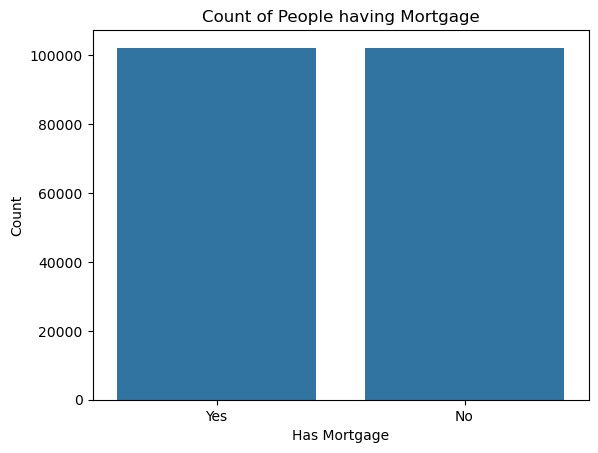

In [163]:
sns.countplot(x='HasMortgage', data=original_df)
plt.xlabel('Has Mortgage')
plt.ylabel('Count')
plt.title("Count of People having Mortgage")
plt.show()

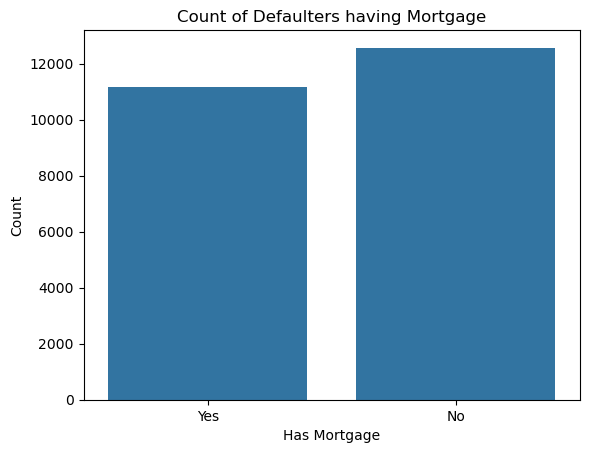

In [164]:
sns.countplot(x='HasMortgage', data=defaulters)
plt.xlabel('Has Mortgage')
plt.ylabel('Count')
plt.title("Count of Defaulters having Mortgage")
plt.show()

In [165]:
# This column is ordinal, so we have to encode it.
# Define the mapping for ordinal encoding
has_mortgage_mapping = {
    'Yes': 1,
    'No': 0
}

# Replace the 'HasMortgage' column in original_df with the encoded values
original_df['HasMortgage'] = original_df['HasMortgage'].map(has_mortgage_mapping)

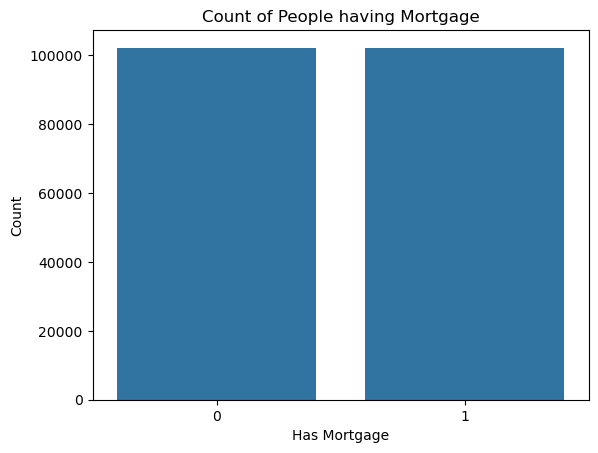

In [166]:
sns.countplot(x='HasMortgage', data=original_df)
plt.xlabel('Has Mortgage')
plt.ylabel('Count')
plt.title("Count of People having Mortgage")
plt.show()

### HasDependents

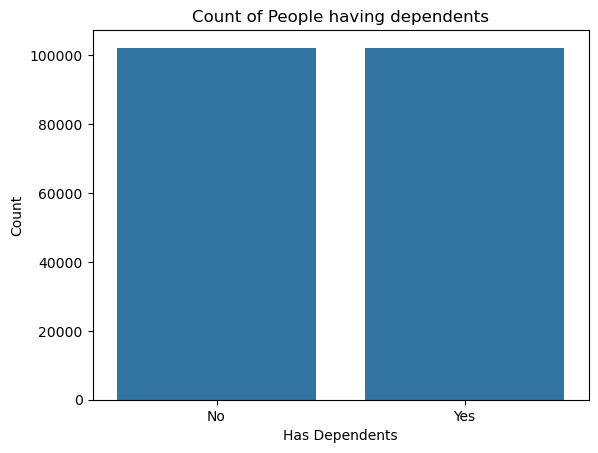

In [167]:
sns.countplot(x='HasDependents', data=original_df)
plt.xlabel('Has Dependents')
plt.ylabel('Count')
plt.title("Count of People having dependents")
plt.show()

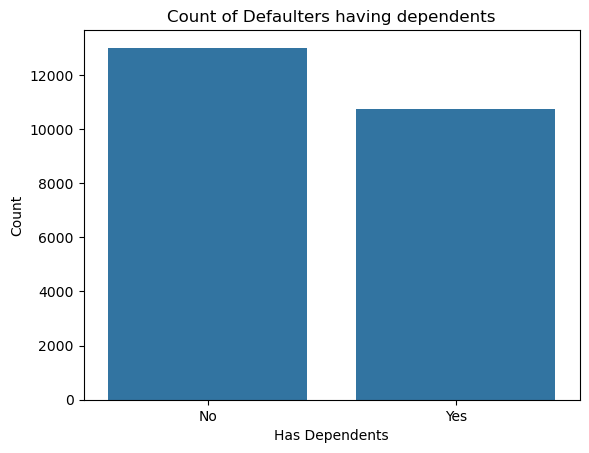

In [168]:
sns.countplot(x='HasDependents', data=defaulters)
plt.xlabel('Has Dependents')
plt.ylabel('Count')
plt.title("Count of Defaulters having dependents")
plt.show()

In [169]:
# This column is ordinal, so we have to encode it.
# Define the mapping for ordinal encoding
has_dependents_mapping = {
    'No': 0,
    'Yes': 1
}

# Replace the 'HasDependents' column in original_df with the encoded values
original_df['HasDependents'] = original_df['HasDependents'].map(has_dependents_mapping)

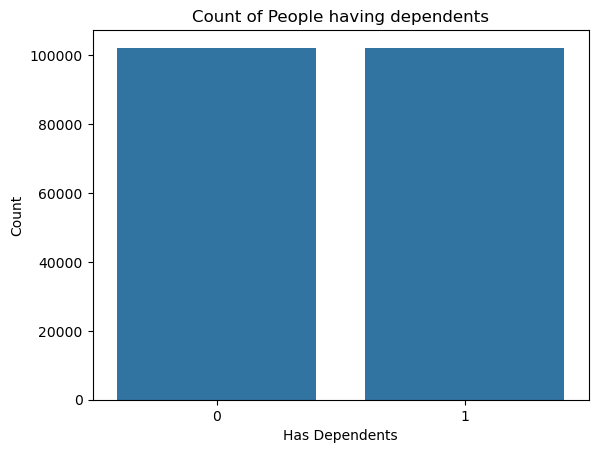

In [170]:
sns.countplot(x='HasDependents', data=original_df)
plt.xlabel('Has Dependents')
plt.ylabel('Count')
plt.title("Count of People having dependents")
plt.show()

### LoanPurpose

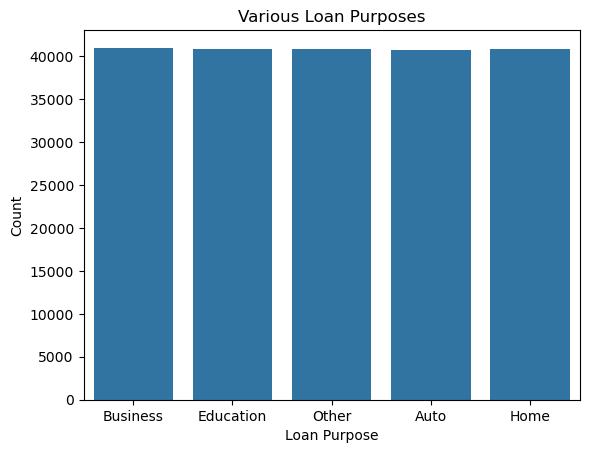

In [171]:
sns.countplot(x='LoanPurpose', data=original_df)
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.title("Various Loan Purposes")
plt.show()

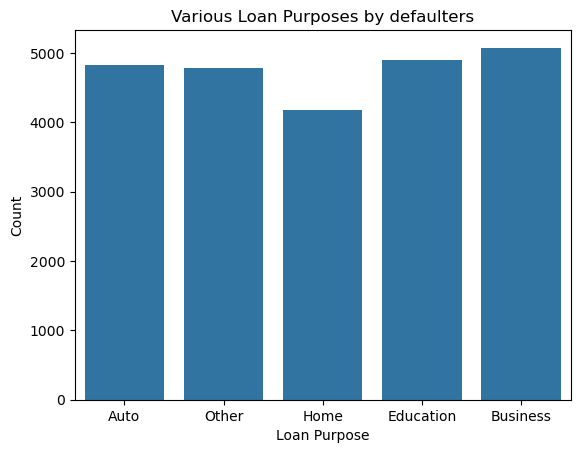

In [172]:
sns.countplot(x='LoanPurpose', data=defaulters)
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.title("Various Loan Purposes by defaulters")
plt.show()

In [173]:
defaulters['LoanPurpose'].value_counts()

LoanPurpose
Business     5074
Education    4895
Auto         4827
Other        4782
Home         4175
Name: count, dtype: int64

In [174]:
# This column is ordinal, so we have to encode it.
# Define the mapping for ordinal encoding
loan_purpose_mapping = {
    'Business': 0,
    'Education':1,
    'Auto':2,
    'Other':3,
    'Home':4
}

# Replace the 'LoanPurpose' column in original_df with the encoded values
original_df['LoanPurpose'] = original_df['LoanPurpose'].map(loan_purpose_mapping)

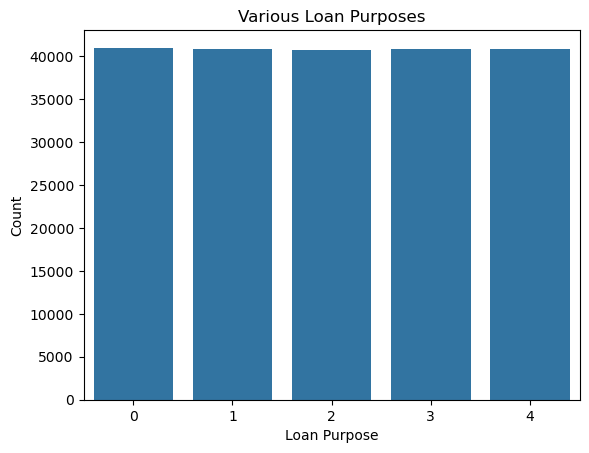

In [175]:
sns.countplot(x='LoanPurpose', data=original_df)
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.title("Various Loan Purposes")
plt.show()

### HasCoSigner

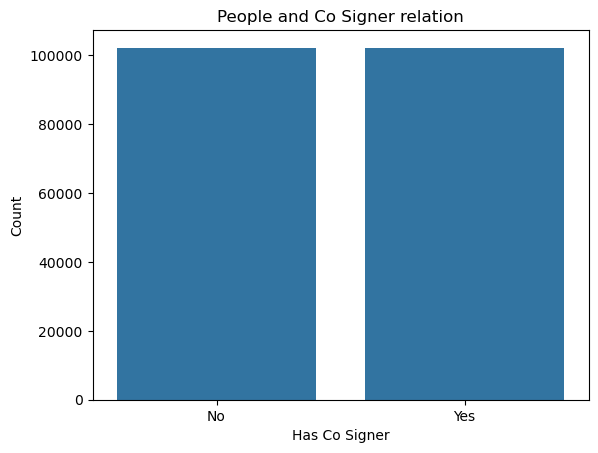

In [176]:
sns.countplot(x='HasCoSigner', data=original_df)
plt.xlabel('Has Co Signer')
plt.ylabel('Count')
plt.title("People and Co Signer relation")
plt.show()

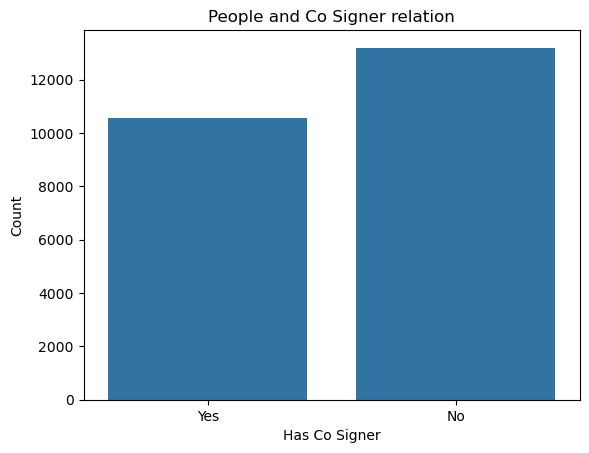

In [177]:
sns.countplot(x='HasCoSigner', data=defaulters)
plt.xlabel('Has Co Signer')
plt.ylabel('Count')
plt.title("People and Co Signer relation")
plt.show()

In [178]:
# This column is ordinal, so we have to encode it.
# Define the mapping for ordinal encoding
has_co_signer_mapping = {
    'No': 0,
    'Yes': 1
}

# Replace the 'HasCoSigner' column in original_df with the encoded values
original_df['HasCoSigner'] = original_df['HasCoSigner'].map(has_co_signer_mapping)

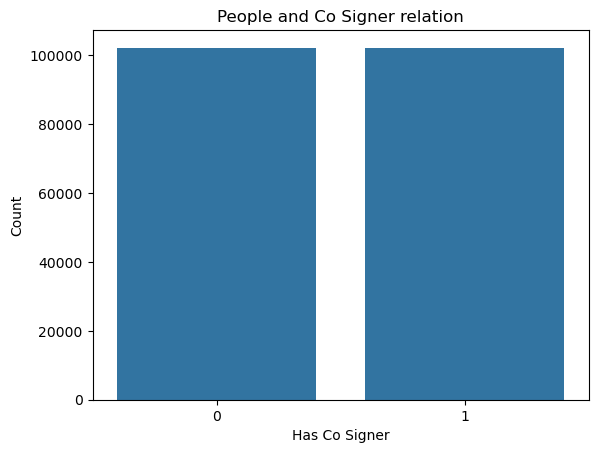

In [179]:
sns.countplot(x='HasCoSigner', data=original_df)
plt.xlabel('Has Co Signer')
plt.ylabel('Count')
plt.title("People and Co Signer relation")
plt.show()

### Analysis and encoding is done

In [180]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204277 entries, 0 to 204276
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          204277 non-null  object 
 1   Age             204277 non-null  int64  
 2   Income          204277 non-null  int64  
 3   LoanAmount      204277 non-null  int64  
 4   CreditScore     204277 non-null  int64  
 5   MonthsEmployed  204277 non-null  int64  
 6   NumCreditLines  204277 non-null  int64  
 7   InterestRate    204277 non-null  float64
 8   LoanTerm        204277 non-null  int64  
 9   DTIRatio        204277 non-null  float64
 10  Education       204277 non-null  int64  
 11  EmploymentType  204277 non-null  int64  
 12  MaritalStatus   204277 non-null  int64  
 13  HasMortgage     204277 non-null  int64  
 14  HasDependents   204277 non-null  int64  
 15  LoanPurpose     204277 non-null  int64  
 16  HasCoSigner     204277 non-null  int64  
 17  Default   

In [181]:
### Drop the loan Id column

In [182]:
original_df.drop('LoanID', axis=1, inplace=True)

In [183]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204277 entries, 0 to 204276
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             204277 non-null  int64  
 1   Income          204277 non-null  int64  
 2   LoanAmount      204277 non-null  int64  
 3   CreditScore     204277 non-null  int64  
 4   MonthsEmployed  204277 non-null  int64  
 5   NumCreditLines  204277 non-null  int64  
 6   InterestRate    204277 non-null  float64
 7   LoanTerm        204277 non-null  int64  
 8   DTIRatio        204277 non-null  float64
 9   Education       204277 non-null  int64  
 10  EmploymentType  204277 non-null  int64  
 11  MaritalStatus   204277 non-null  int64  
 12  HasMortgage     204277 non-null  int64  
 13  HasDependents   204277 non-null  int64  
 14  LoanPurpose     204277 non-null  int64  
 15  HasCoSigner     204277 non-null  int64  
 16  Default         204277 non-null  int64  
dtypes: float64

## Principle Component Analysis

In [184]:
# Separate features and output
X = original_df.drop('Default', axis=1)
y = original_df['Default']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to get all principal components
pca = PCA(n_components=16)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame with principal components as columns and 'Default' as the output column
pca_columns = [f'PC{i+1}' for i in range(16)]
pca_df = pd.DataFrame(X_pca, columns=pca_columns)
pca_df['Default'] = y.values  # Add the output column

# Display the explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio for each principal component:", explained_variance)
print("Cumulative explained variance:", explained_variance.cumsum())

Explained variance ratio for each principal component: [0.06337281 0.06317623 0.06302595 0.06287837 0.06283168 0.06275425
 0.06267357 0.06256137 0.06251406 0.06236321 0.06224472 0.06218834
 0.06206176 0.061997   0.06178484 0.06157182]
Cumulative explained variance: [0.06337281 0.12654904 0.189575   0.25245337 0.31528505 0.3780393
 0.44071288 0.50327425 0.56578831 0.62815151 0.69039623 0.75258457
 0.81464633 0.87664333 0.93842818 1.        ]


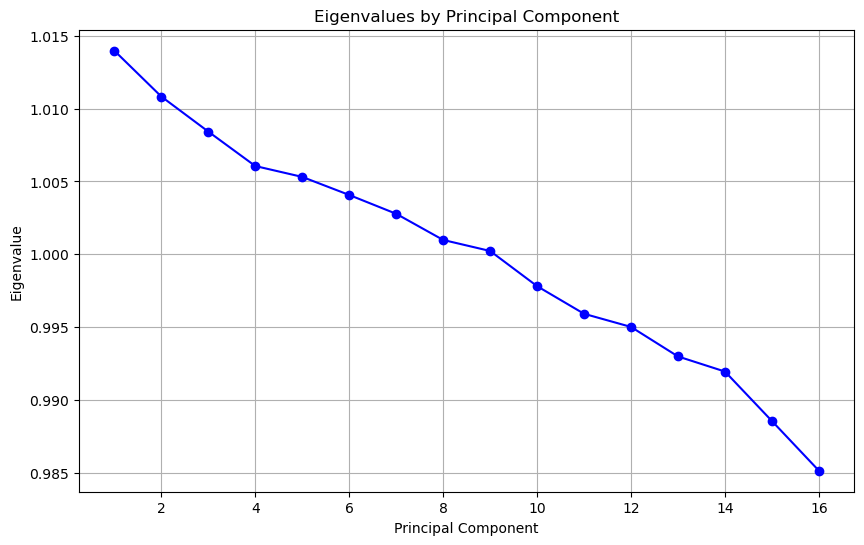

In [185]:
# Separate features and output
X = original_df.drop('Default', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=16)
pca.fit(X_scaled)

# Eigenvalues (variance explained by each principal component)
# The explained_variance_ attribute of the PCA object in sklearn gives these eigenvalues, which correspond to the variance explained by each principal component.
eigenvalues = pca.explained_variance_

# Plot the eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues by Principal Component')
plt.grid(True)
plt.show()


In [186]:
#  highest eigenvalue is 1.015 and the lowest is 0.985, means all principal components have nearly the same eigenvalue, indicating that each feature contributes a similar amount of variance.

In [187]:
# no single feature dominates and retaining all features seems beneficial since every component captures close to an equal share of the variance

## Writing the processed data to a file so that different people can directly use it to train their respective models

In [188]:
original_df.to_csv('Processed_train.csv',index=False)

# Trying Various Models

## Note : Since all the models we are using in part 1 are tree based and not distance based, scaling the data is not needed

### Function to encode all categorical data

In [189]:
def encode_data(df):
    df['HasCoSigner'] = df['HasCoSigner'].map(has_co_signer_mapping)
    df['LoanPurpose'] = df['LoanPurpose'].map(loan_purpose_mapping)
    df['HasDependents'] = df['HasDependents'].map(has_dependents_mapping)
    df['HasMortgage'] = df['HasMortgage'].map(has_mortgage_mapping)
    df['MaritalStatus'] = df['MaritalStatus'].map(marital_status_mapping)
    df['EmploymentType'] = df['EmploymentType'].map(employment_mapping)
    df['Education'] = df['Education'].map(education_mapping)

### Read the test input

In [190]:
test_df=pd.read_csv('test.csv')

In [191]:
test_df.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
dtype: int64

In [192]:
encode_data(test_df)

In [193]:
test_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,CKV34LU7V7,55,112656,92393,581,113,2,23.54,36,0.15,4,3,2,1,1,4,0
1,62KTYNH93J,56,91569,131575,641,54,1,15.19,12,0.43,1,2,1,1,1,1,1
2,JGFUSOIUH7,26,78169,75417,569,105,3,18.02,12,0.29,3,2,3,1,1,1,1
3,4538THBHOX,26,63033,10804,326,118,1,14.71,24,0.41,1,2,2,0,0,0,1
4,DXLNA06JHR,24,29665,21182,662,102,3,15.02,60,0.69,4,1,2,0,1,0,1


## Write the processed test data to another file so that it can be directly used as well

In [194]:
test_df.to_csv('Processed_test.csv',index=False)